# Data Fitting & Denoising
### Amirhossein Shanaghi
### Student ID : 810899056

____
____

### Auxiliary functions


In [ ]:
import cv2
import matplotlib.pyplot as plt

def load_image(path,size = (256,256)):
    img = cv2.imread(path,0)
    img = cv2.resize(img, size)
    return img

def show_image(image):
    plt.imshow(image,cmap='gray')

def load_data(path):
    file = open(path).read().split('\n')
    lines = [line.split() for line in file]
    return [(eval(x[0]),eval(x[1])) for x in lines ]

___

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Q1

### Q1.1


In [99]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def show_images(images, titles, max_cols=5):
    num_images = len(images)
    rows = (num_images + max_cols - 1) // max_cols
    plt.figure(figsize=(10, 5 * rows))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, max_cols, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def denoise_image(image, lam, axis):
    m, n = image.shape
    if axis == 'vertical':
        L = np.eye(n) - np.roll(np.eye(n), 1, axis=0)
    else:  # 'horizontal'
        L = np.eye(m) - np.roll(np.eye(m), 1, axis=0)
    L[0, :] = 0
    A = np.eye(L.shape[0]) + lam * L.T @ L
    return np.linalg.solve(A, image.T).T if axis == 'vertical' else np.linalg.solve(A, image)

def apply_denoising(image, lambda_values, axis):
    results, titles = [], []
    for lam in lambda_values:
        denoised = denoise_image(image, lam, axis)
        results.append(denoised)
        titles.append(f"λ={lam:.2f}")
    return results, titles

# Image paths and types
images_info = [
    {'path': '/content/drive/My Drive/images/img1.png', 'type': 'vertical'},
    {'path': '/content/drive/My Drive/images/img2.png', 'type': 'vertical'},
    {'path': '/content/drive/My Drive/images/img3.png', 'type': 'horizontal'},
    {'path': '/content/drive/My Drive/images/img4.png', 'type': 'horizontal'},
    {'path': '/content/drive/My Drive/images/img5.png', 'type': 'random'},
    {'path': '/content/drive/My Drive/images/img6.png', 'type': 'random'}
]

images = [(load_image(info['path']), info['type']) for info in images_info]

lambda_ranges = {
    'vertical': np.linspace(1.17, 6, 3),
    'horizontal': np.linspace(1.17, 6, 5),
    'random': np.linspace(1.17, 6, 5)
}

#for image, noise_type in images:
  #  results, titles = apply_denoising(image, lambda_ranges[noise_type], 'vertical' if noise_type == 'vertical' else 'horizontal')
  #  show_images([image] + results, ["Original " + noise_type.capitalize()] + titles)




### Q1.2

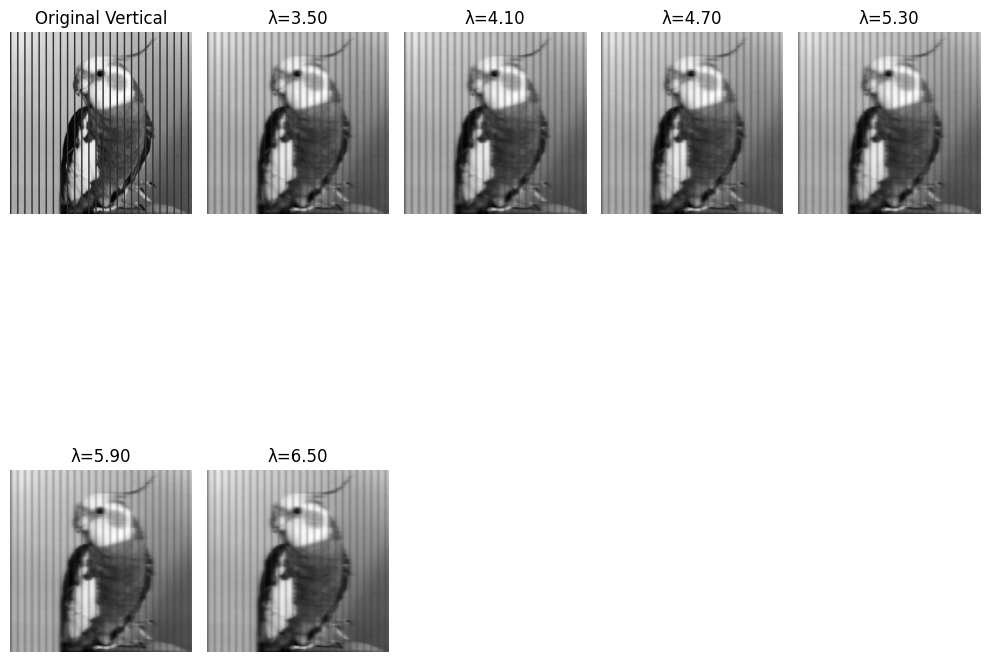

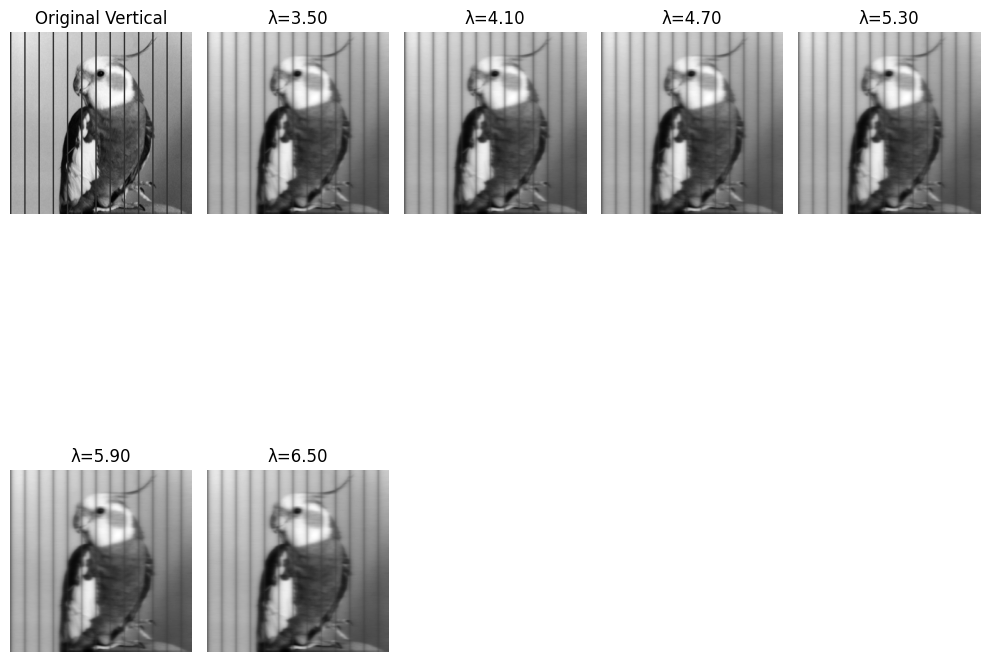

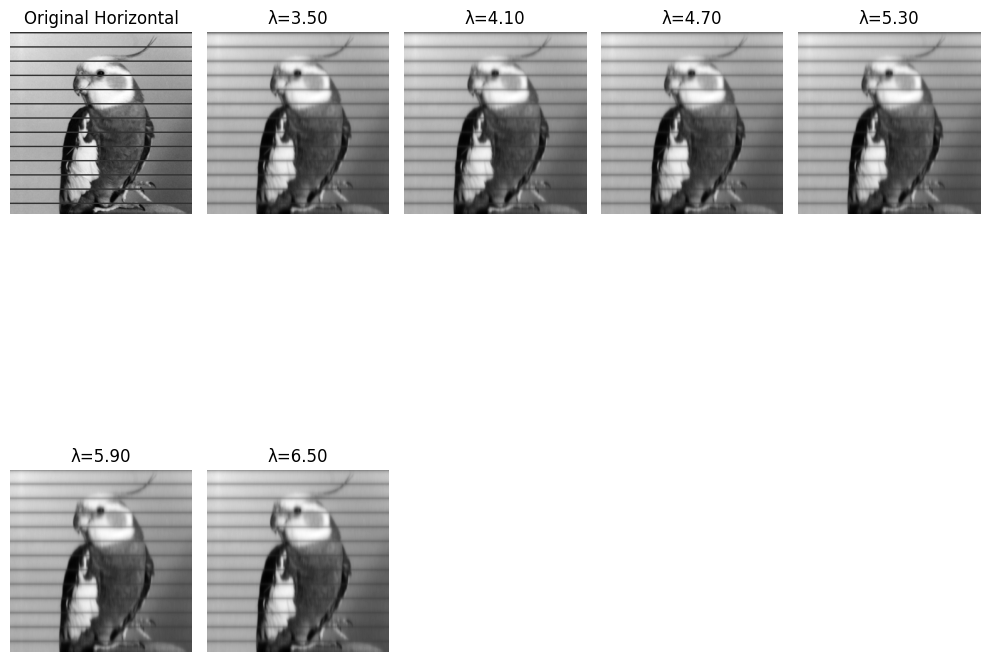

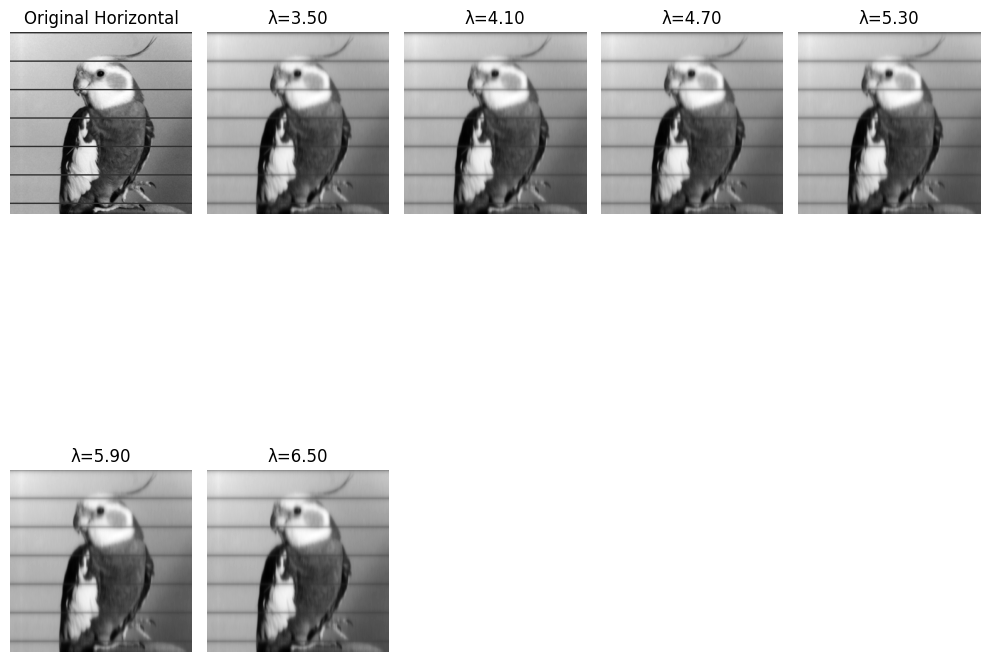

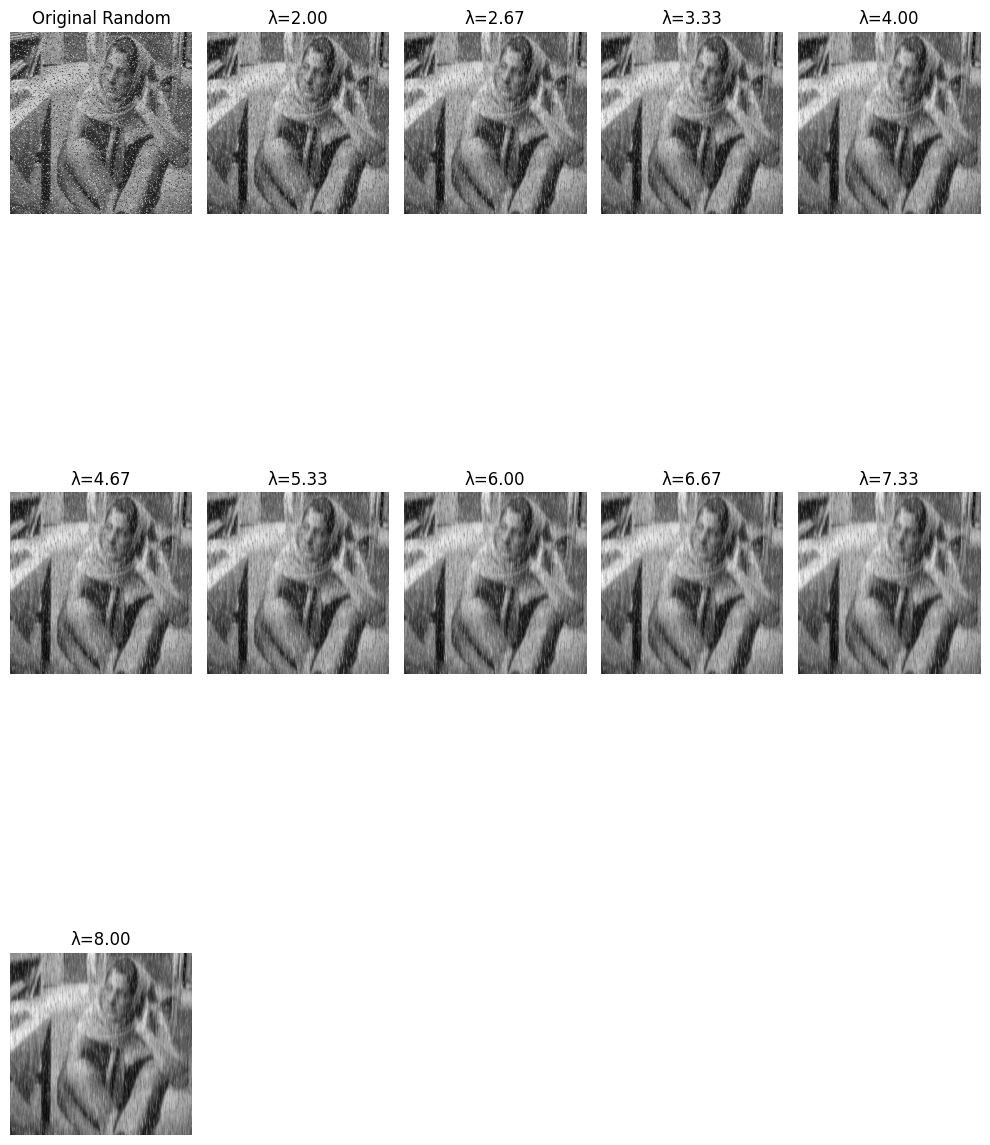

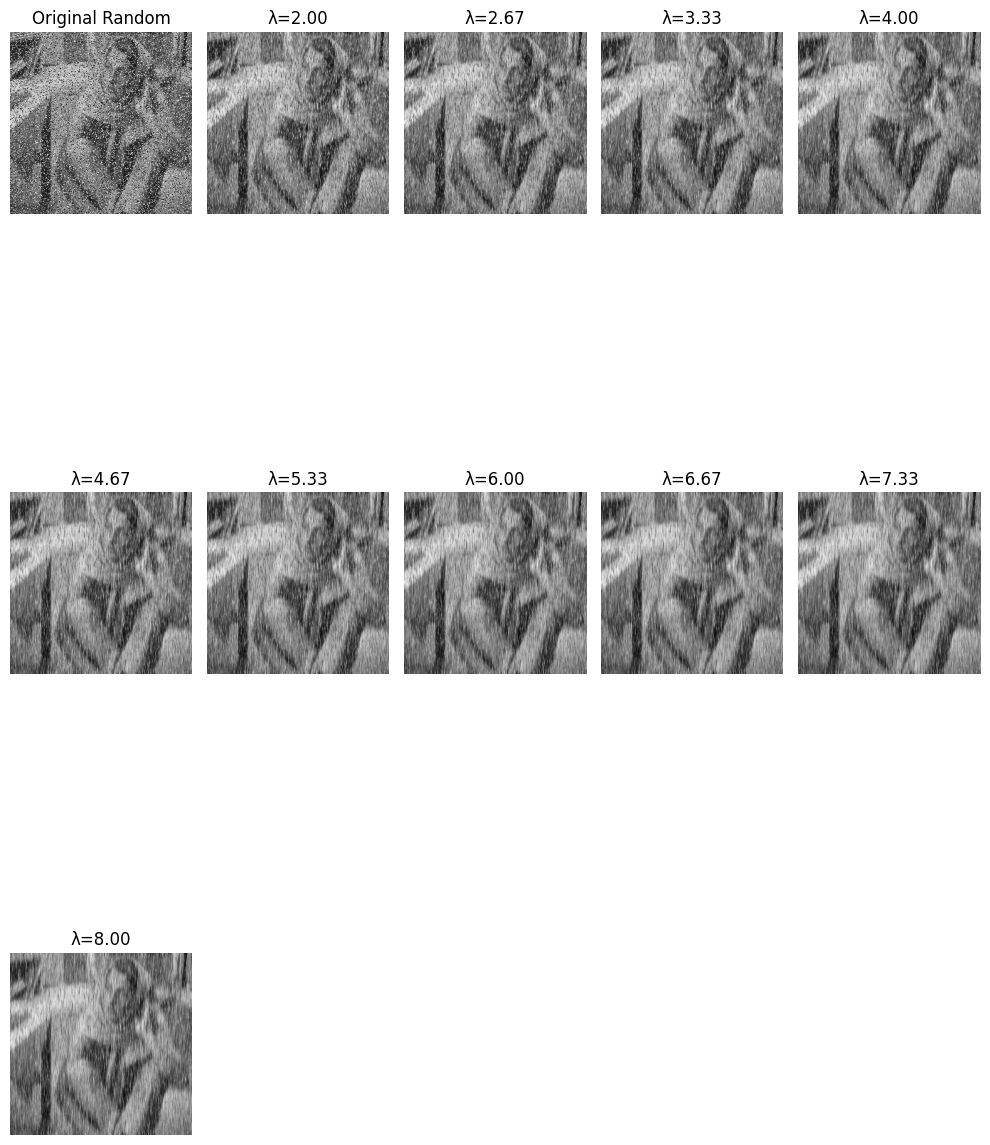

In [100]:
images_info = [
    {'path': '/content/drive/My Drive/images/img1.png', 'type': 'vertical'},
    {'path': '/content/drive/My Drive/images/img2.png', 'type': 'vertical'},
    {'path': '/content/drive/My Drive/images/img3.png', 'type': 'horizontal'},
    {'path': '/content/drive/My Drive/images/img4.png', 'type': 'horizontal'},
    {'path': '/content/drive/My Drive/images/img5.png', 'type': 'random'},
    {'path': '/content/drive/My Drive/images/img6.png', 'type': 'random'}
]

images = [(load_image(info['path']), info['type']) for info in images_info]
lambda_ranges = {
    'vertical': np.linspace(3.5, 6.5, 6),
    'horizontal': np.linspace(3.5, 6.5, 6),
    'random': np.linspace(2, 8, 10)
}

for image, noise_type in images:
    results, titles = apply_denoising(image, lambda_ranges[noise_type], 'vertical' if noise_type == 'vertical' else 'horizontal')
    show_images([image] + results, ["Original " + noise_type.capitalize()] + titles)
#best lambda for img1 = 5.9
#best lambda for img2 = 3.5
#best lambda for img3 = 5.9
#best lambda for img4 = 3.5
#best lambda for img5 = 3.33
#best lambda for img6 = 4.67





___

### Q1.3
The effectiveness of linear denoising methods for noise removal in images has shown that these techniques can be useful in specific situations but come with several limitations. **Particularly, this method is effective in scenarios where the noise follows a regular, linear pattern, such as vertical or horizontal noise**. The ability to adjust the parameter λ allows for the intensity of the denoising to be tailored based on the characteristics of the present noise.

**Disadvantages of Using This Method:**
1.	**Limitation on Noise Type**: This method is most effective for noises that have a specific pattern and is less efficient against random or more complex noise.
2.	**Potential for Overfitting**: If the parameter λ is chosen too large, important details of the image may also be removed.
**Results Obtained**:
Based on the results, the best performance of this method is seen in removing vertical and horizontal noises. In contrast, random noises, which do not have a specific pattern, are less improved by this method. This indicates that for practical applications where noises may be a combination of various types, there may be a need to use more complex methods to ensure that noise is effectively reduced or eliminated.



### Q1.4

Here, although both methods contribute to noise reduction, the results obtained by using a filter with a larger size (λ=9) and using a filter with a smaller size several times (λ=3) will be different. Applying the filter multiple times may preserve more detail and gradually reduce noise, while applying it once with a larger kernel may remove more noise but with the possibility of losing more detail.

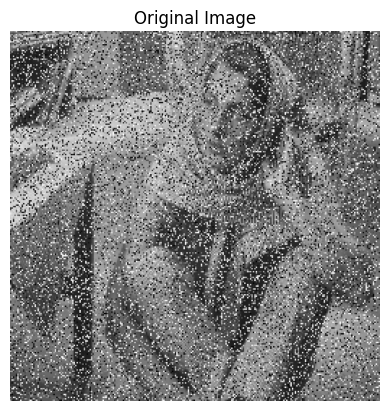

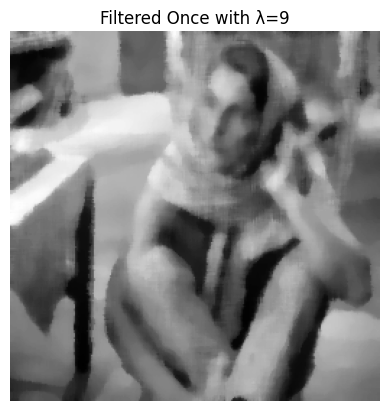

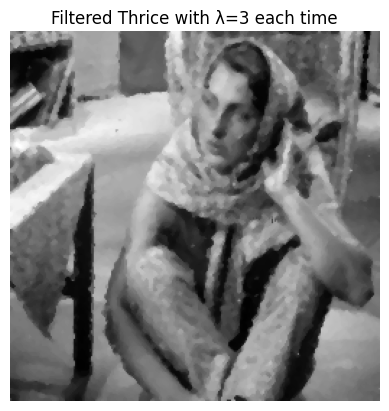

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_show_image(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    return image

def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

def show_image(image, title="Filtered Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

image_path = '/content/drive/My Drive/images/img6.png'
image = load_and_show_image(image_path)

filtered_image_once = apply_median_filter(image, kernel_size=9)
show_image(filtered_image_once, "Filtered Once with λ=9")

filtered_image_multiple = image
for _ in range(3):  # Equivalent to applying λ=3, three times
    filtered_image_multiple = apply_median_filter(filtered_image_multiple, kernel_size=3)
show_image(filtered_image_multiple, "Filtered Thrice with λ=3 each time")








### Q1.5



To recover lost details in images after denoising, one effective method is to apply a **sharpening technique** post-denoising. This method enhances the visibility of edges and fine details which might have been blurred or diminished during the denoising process. Below, the process involves using Python with OpenCV to implement this method:


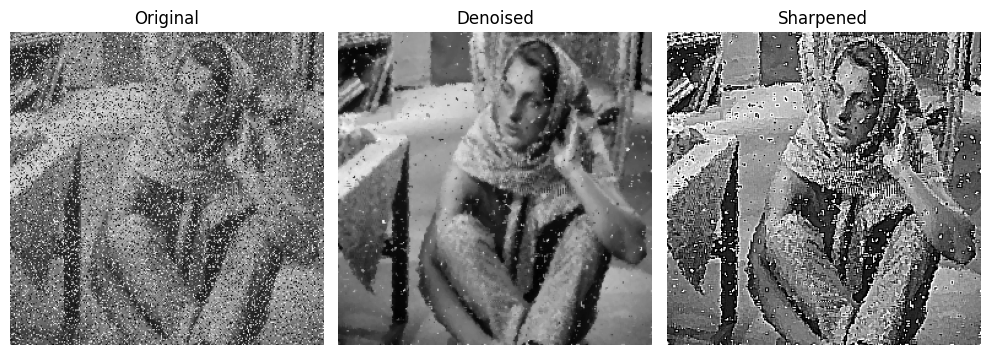

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def apply_median_filter(image):
    return cv2.medianBlur(image, 3)

def apply_sharpening(image):
    sharpening_kernel = np.array([[-1, -1, -1],
                                  [-1,  9, -1],
                                  [-1, -1, -1]])
    return cv2.filter2D(image, -1, sharpening_kernel)

def show_images(images, titles):

    plt.figure(figsize=(10, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


image_path = '/content/drive/My Drive/images/img6.png'
image = load_image(image_path)
denoised_image = apply_median_filter(image)
sharpened_image = apply_sharpening(denoised_image)

# Show original, denoised, and sharpened images
show_images([image, denoised_image, sharpened_image],
            ["Original", "Denoised", "Sharpened"])


____
____

# Q2

### Q2.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    data = np.loadtxt(file_path, delimiter=' ')
    return data[:, 0], data[:, 1]
def create_design_matrix(x, degree):
    n = len(x)
    X = np.ones((n, degree + 1))
    for i in range(1, degree + 1):
        X[:, i] = x ** i
    return X

def solve_coefficients(X, y):
    XtX = np.dot(X.T, X)
    Xty = np.dot(X.T, y)
    beta = np.linalg.solve(XtX, Xty)
    return beta









### Q2.2

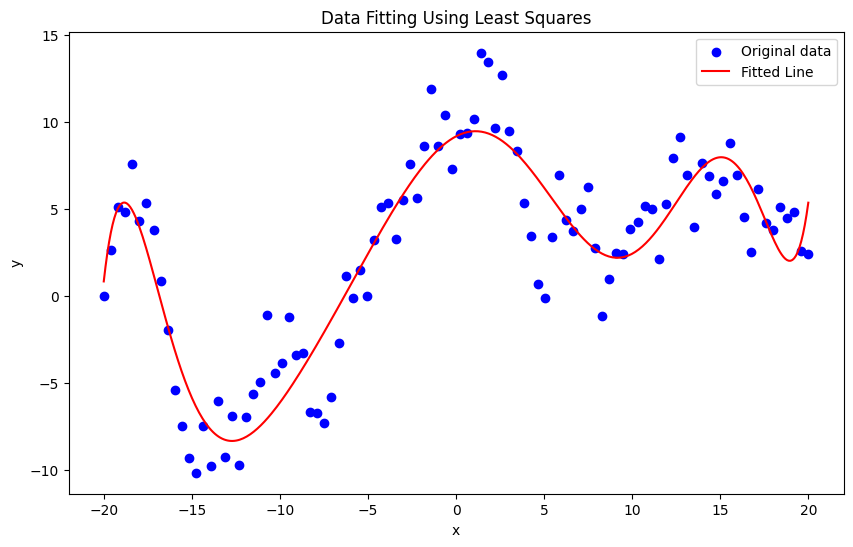

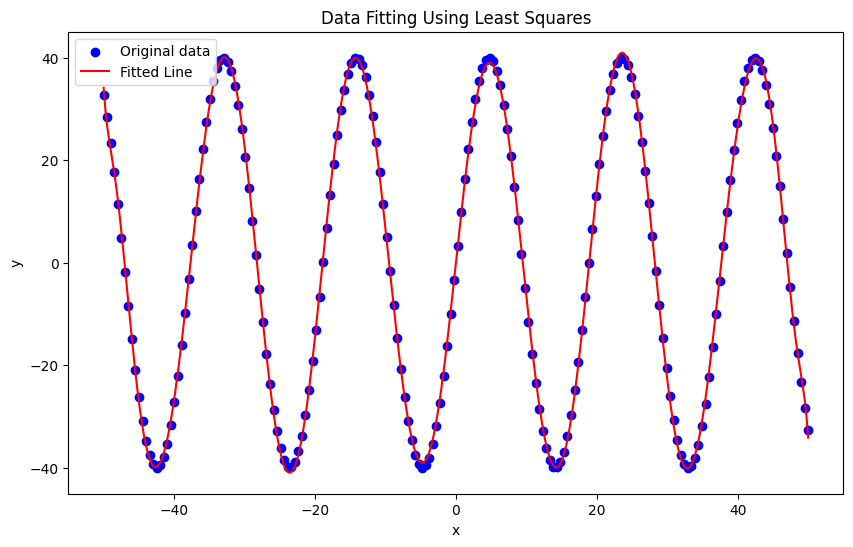

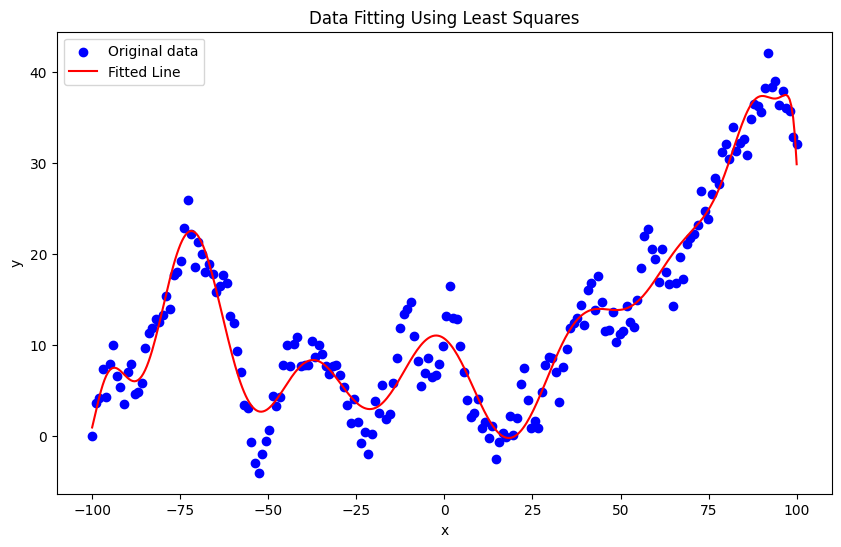

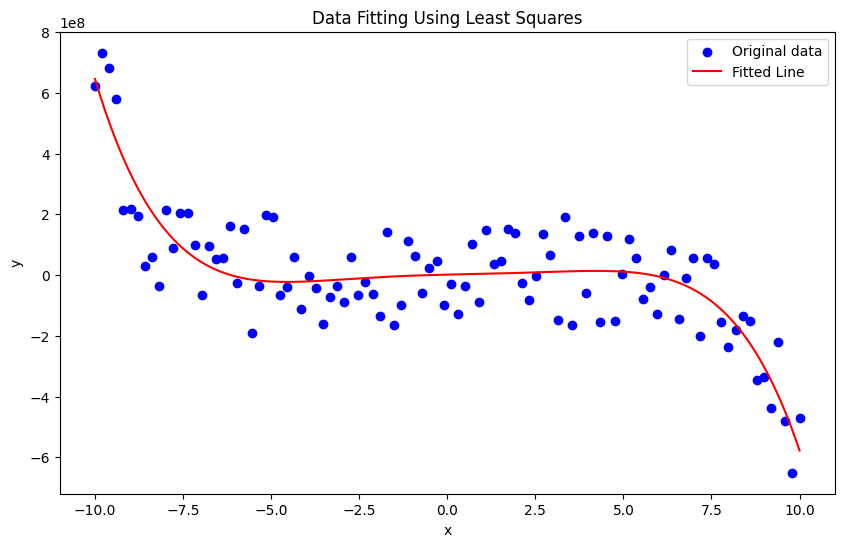

In [ ]:
def plot_data_and_fit(x, y, coefficients):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Original data')

    # Create fitted line
    x_fit = np.linspace(min(x), max(x), 400)
    y_fit = np.polyval(list(reversed(coefficients)), x_fit)

    plt.plot(x_fit, y_fit, 'r-', label='Fitted Line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Data Fitting Using Least Squares')
    plt.legend()
    plt.show()

x1, y1 = load_data('/content/drive/My Drive/data/Data1.txt')
x2, y2 = load_data('/content/drive/My Drive/data/Data2.txt')
x3, y3 = load_data('/content/drive/My Drive/data/Data3.txt')
x4, y4 = load_data('/content/drive/My Drive/data/Data4.txt')



degree = 9
X1 = create_design_matrix(x1, degree)
coefficients1 = solve_coefficients(X1, y1)

degree = 19
X2 = create_design_matrix(x2, degree)
coefficients2 = solve_coefficients(X2, y2)

degree = 18
X3 = create_design_matrix(x3, degree)
coefficients3 = solve_coefficients(X3, y3)

degree = 5
X4 = create_design_matrix(x4, degree)
coefficients4 = solve_coefficients(X4, y4)

# Plot the data and fits
plot_data_and_fit(x1, y1, coefficients1)
plot_data_and_fit(x2, y2, coefficients2)
plot_data_and_fit(x3, y3, coefficients3)
plot_data_and_fit(x4, y4, coefficients4)

### Q2.3

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.04939e-42): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.40988e-41): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.11482e-41): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.81976e-41): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

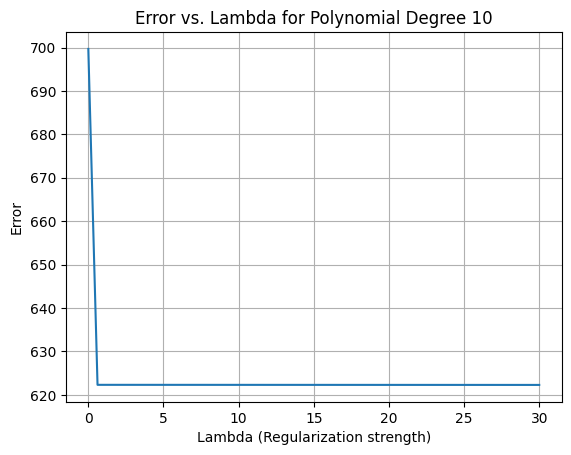

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.26864e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.53729e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.80593e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.07458e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

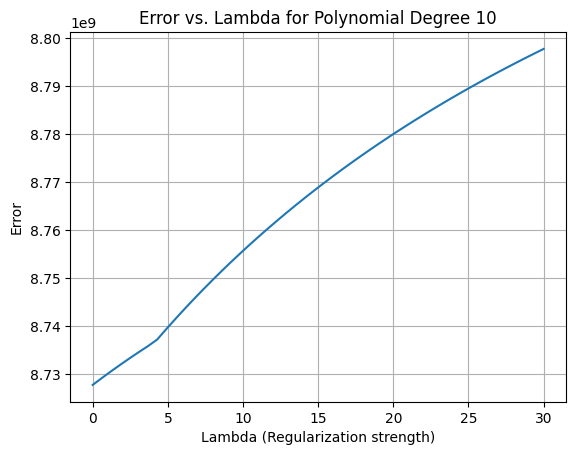

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def load_and_sort_data(file_path):
    data = np.loadtxt(file_path, delimiter=' ')
    data_sorted = data[np.argsort(data[:, 0])]
    return data_sorted[:, 0], data_sorted[:, 1]

def denoise_and_fit(x, y, degree, alpha):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    model.fit(x[:, np.newaxis], y)
    return model

def calculate_error(x, y, model):
    y_pred = model.predict(x[:, np.newaxis])
    return np.sum(np.abs(y_pred - y))

def experiment_with_lambdas(x, y, degree, max_lambda):
    lambdas = np.linspace(0, max_lambda, 50)
    errors = []
    for alpha in lambdas:
        model = denoise_and_fit(x, y, degree, alpha)
        error = calculate_error(x, y, model)
        errors.append(error)
    plt.plot(lambdas, errors)
    plt.xlabel('Lambda (Regularization strength)')
    plt.ylabel('Error')
    plt.title(f'Error vs. Lambda for Polynomial Degree {degree}')
    plt.grid(True)
    plt.show()

# Load and sort data
x3, y3 = load_and_sort_data('/content/drive/My Drive/data/Data3.txt')
x4, y4 = load_and_sort_data('/content/drive/My Drive/data/Data4.txt')

# Assuming we want to fit a polynomial of degree 10
degree = 10
experiment_with_lambdas(x3, y3, degree, 30)
experiment_with_lambdas(x4, y4, degree, 30)


____

### Q2.4

**No**, it is not always possible to find a suitable polynomial to accurately estimate a given dataset. The success of polynomial fitting heavily depends on several factors:
1.	Nature of the Data: Polynomial models work best with data that exhibit a general trend that can be well described by a polynomial function. **If the data is highly irregular or has complex patterns that vary significantly over the range, polynomial fitting may not be effective.**
2.	Degree of the Polynomial: The degree of the polynomial must be chosen carefully. A degree too low may not capture all the dynamics of the data (underfitting), whereas a degree too high might lead to fitting the noise in the data rather than the underlying trend (overfitting).
3.	**Distribution of Data Points**: The distribution and density of data points across the domain affect the fitting. Sparse or unevenly distributed data points can lead to poor estimates.
4.	**Noise**: The presence of high levels of noise can also impair the ability of a polynomial to effectively model the underlying trend.


### Q2.5

The impact of the noise removal parameter (typically lambda in regularization techniques) is significant. Adjusting this parameter influences how strongly the noise is suppressed during the fitting process. **Increasing the parameter typically enhances the smoothing effect, reducing the influence of noise on the model. However, excessively high values can oversmooth the data, leading to underfitting, where important features and trends in the data may be ignored.**

In summary, properly tuning the noise removal parameter can indeed increase the accuracy of the model by balancing between overfitting (capturing too much noise) and underfitting (ignoring significant patterns). Finding the right level of smoothing is crucial for achieving the best predictive performance.